In [87]:
# import statistical tools
from __future__ import print_function
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [88]:
# import data visualisation tools
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
%matplotlib inline

In [89]:
# create data
np.random.seed(1)
x1 = pd.DataFrame(np.array([np.random.uniform(size = 100)]))
x2 = pd.DataFrame(0.5*x1+np.random.standard_normal(size = 100)/10)
y = pd.DataFrame(2+2*x1+0.3*x2+np.random.standard_normal(size = 100))

In [90]:
x1T= x1.T
x1T.columns = ['x1']
x2T = x2.T
x2T.columns = ['x2']
yT = y.T
yT.columns = ['y']

In [92]:
print()
corrx1x2 = np.corrcoef(x1, x2)[0, 1]
print("Correlation between x1 and x2 is: %f\n" % corrx1x2)


Correlation between x1 and x2 is: 0.839060



Text(0,0.5,'y1')

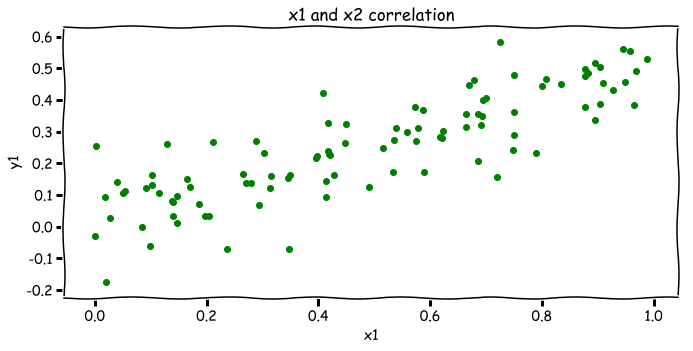

In [93]:
plt.xkcd()
plt.figure(figsize = (11, 5))
plt.scatter(x1, x2, color = 'g')
plt.title("x1 and x2 correlation")
plt.xlabel("x1")
plt.ylabel("y1")

In [94]:
# 14.c. run regression#1

X1T = sm.add_constant(x1T)
data = pd.concat([x1T, x2T, yT], axis = 1)
reg_1 = ols("yT~x1T+x2T", data = data).fit()
print(reg_1.summary())
print(colored("="*78, 'green'))

                            OLS Regression Results                            
Dep. Variable:                     yT   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           4.40e-07
Time:                        18:12:49   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1893      0.199     11.021      0.0

In [95]:
# 14.d. run regression#2
reg_2 = ols("yT~x1T", data = data).fit()
print(reg_2.summary())
print(colored("="*78, 'green'))

                            OLS Regression Results                            
Dep. Variable:                     yT   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           6.68e-07
Time:                        18:13:02   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2486      0.201     11.209      0.0

In [96]:
# 14.3. run regression#3
reg_3 = ols("yT~x2T", data = data).fit()
print(reg_3.summary())
print(colored("="*78, 'green'))

                            OLS Regression Results                            
Dep. Variable:                     yT   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           1.09e-07
Time:                        18:13:09   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2655      0.187     12.145      0.0

In [97]:
# 14.g. additional observation
add_values = pd.DataFrame([0.1, 0.8, 6.0]).T
add_values.columns = ['x1','x2','y']
data = data.append(add_values, ignore_index = False)
print()
reg_4 = ols("y~x1+x2", data = data).fit()
print(reg_4.summary())
print()
reg_5 = ols("y~x1", data = data).fit()
print(reg_5.summary())
print()
reg_6 = ols("y~x2", data = data).fit()
print(reg_6.summary())
print(colored("="*78, 'green'))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     19.92
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           5.51e-08
Time:                        18:13:19   Log-Likelihood:                -144.15
No. Observations:                 101   AIC:                             294.3
Df Residuals:                      98   BIC:                             302.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1996      0.199     11.041      0.

Text(0,0.5,'residuals')

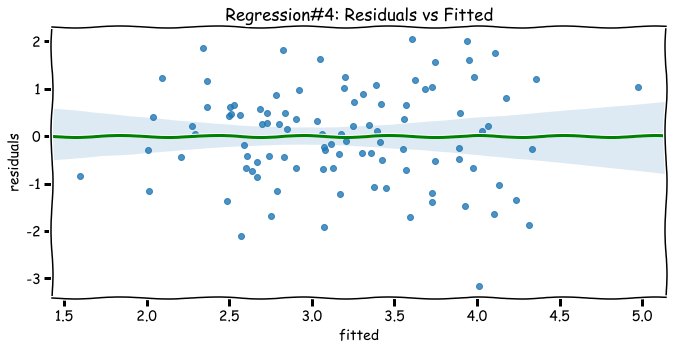

In [98]:
# regression#4: residuals vs fitted plot
plt.xkcd()
fitted_4 = pd.DataFrame([reg_4.predict()]).T
fitted_4.columns = ['fitted']
residuals_4 = reg_4.resid
data_4 = pd.concat([fitted_4, residuals_4.reset_index(drop=True)], axis = 1)
data_4.columns = ['fitted','residuals']
plt.figure(figsize = (11, 5))
reg_plot_4 = sns.regplot(fitted_4, residuals_4, data = data_4)
regline_4 = reg_plot_4.get_lines()[0]
regline_4.set_color('green')
plt.title("Regression#4: Residuals vs Fitted")
plt.xlabel("fitted")
plt.ylabel("residuals")

<Figure size 792x360 with 0 Axes>

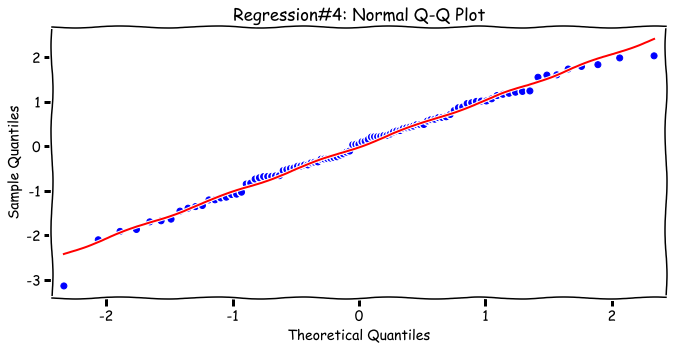

In [99]:
# regression#4: normal q-q plot
plt.figure(figsize = (11, 5))
sm.qqplot(reg_4.resid_pearson, fit = True, line = 'r') # another way to do it
plt.title("Regression#4: Normal Q-Q Plot")
fig = plt.gcf()
fig.set_size_inches(11, 5)
plt.show()

<Figure size 792x360 with 0 Axes>

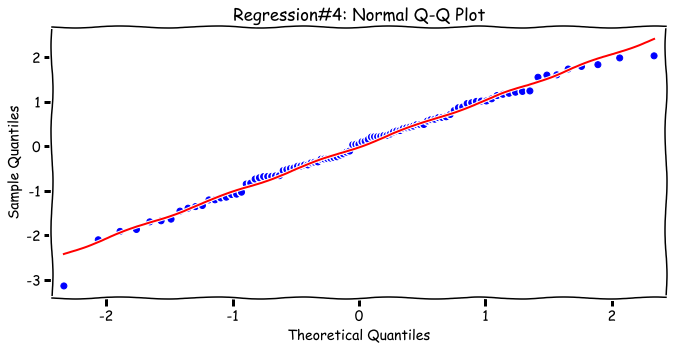

In [100]:
# regression#4: normal q-q plot
plt.figure(figsize = (11, 5))
sm.qqplot(reg_4.resid_pearson, fit = True, line = 'r') # another way to do it
plt.title("Regression#4: Normal Q-Q Plot")
fig = plt.gcf()
fig.set_size_inches(11, 5)
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

invalid value encountered in sqrt



Text(0.5,1,'Regression#4: Scale-Location Plot')

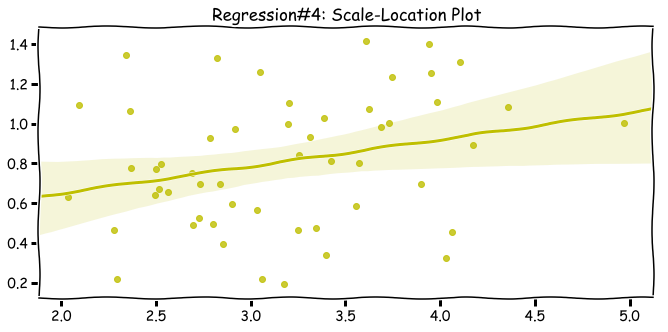

In [101]:
# regression#4: scale-location plot
plt.xkcd()
plt.figure(figsize = (11, 5))
sns.regplot(fitted_4, np.sqrt(reg_4.resid_pearson), fit_reg = True, color = 'y')
plt.title("Regression#4: Scale-Location Plot")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

invalid value encountered in sqrt



Text(0.5,1,'Regression#4: Scale-Location Plot')

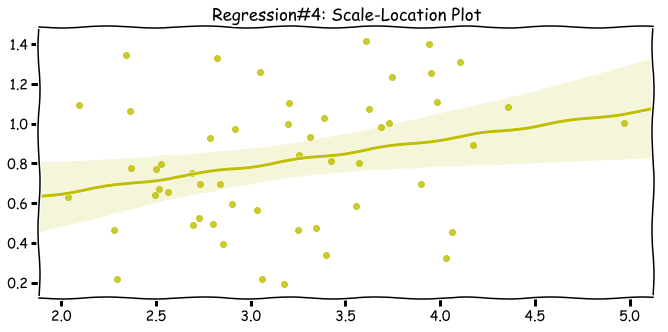

In [102]:
# regression#4: scale-location plot
plt.xkcd()
plt.figure(figsize = (11, 5))
sns.regplot(fitted_4, np.sqrt(reg_4.resid_pearson), fit_reg = True, color = 'y')
plt.title("Regression#4: Scale-Location Plot")

<Figure size 2160x360 with 0 Axes>

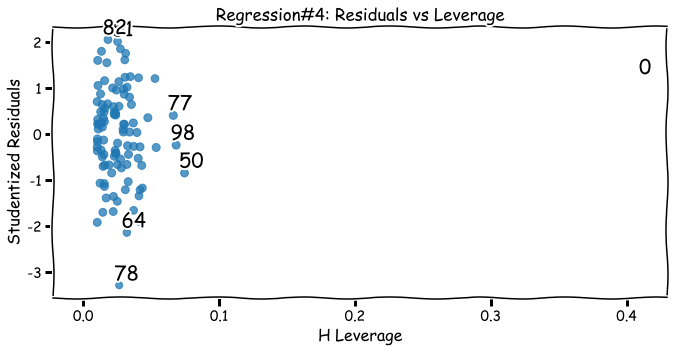

In [103]:
# regression#4: residuals vs leverage plot
plt.xkcd()
fig = plt.figure(figsize = (11, 5))
fig.set_size_inches(30, fig.get_figheight(), forward=True)
sm.graphics.influence_plot(reg_4, criterion="cooks", size = 0.0002**2)
plt.title("Regression#4: Residuals vs Leverage")
fig = plt.gcf()
fig.set_size_inches(11, 5)
plt.show()

Text(0,0.5,'residuals')

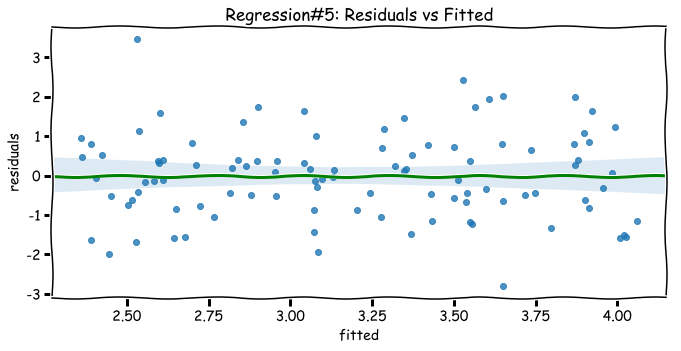

In [104]:
# regression#5: residuals vs fitted plot
plt.xkcd()
fitted_5 = pd.DataFrame([reg_5.predict()]).T
fitted_5.columns = ['fitted']
residuals_5 = reg_5.resid
data_5 = pd.concat([fitted_5, residuals_5.reset_index(drop=True)], axis = 1)
data_5.columns = ['fitted','residuals']
plt.figure(figsize = (11, 5))
reg_plot_5 = sns.regplot(fitted_5, residuals_5, data = data_5)
regline_5 = reg_plot_5.get_lines()[0]
regline_5.set_color('green')
plt.title("Regression#5: Residuals vs Fitted")
plt.xlabel("fitted")
plt.ylabel("residuals")

<Figure size 792x360 with 0 Axes>

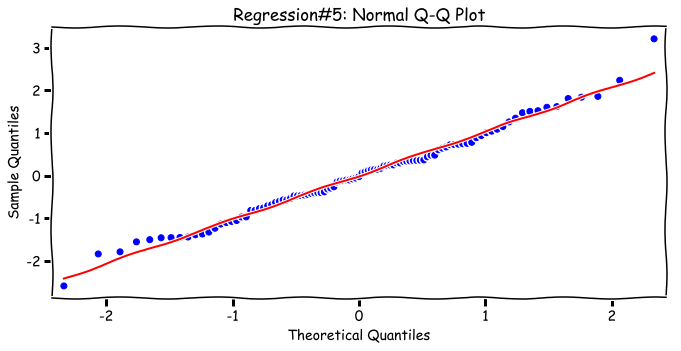

In [105]:
# regression#5: normal q-q plot
plt.figure(figsize = (11, 5))
sm.qqplot(reg_5.resid_pearson, fit = True, line = 'r') # another way to do it
plt.title("Regression#5: Normal Q-Q Plot")
fig = plt.gcf()
fig.set_size_inches(11, 5)
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

invalid value encountered in sqrt



Text(0.5,1,'Regression#5: Scale-Location Plot')

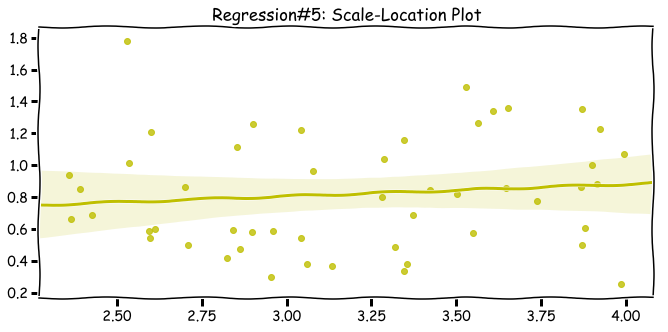

In [106]:
# regression#5: scale-location plot
plt.xkcd()
plt.figure(figsize = (11, 5))
sns.regplot(fitted_5, np.sqrt(reg_5.resid_pearson), fit_reg = True, color = 'y')
plt.title("Regression#5: Scale-Location Plot")

<Figure size 2160x360 with 0 Axes>

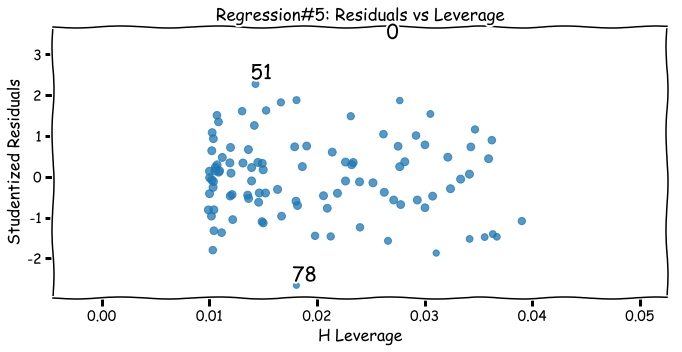

In [107]:
# regression#5: residuals vs leverage plot
plt.xkcd()
fig = plt.figure(figsize = (11, 5))
fig.set_size_inches(30, fig.get_figheight(), forward=True)
sm.graphics.influence_plot(reg_5, criterion="cooks", size = 0.0002**2)
plt.title("Regression#5: Residuals vs Leverage")
fig = plt.gcf()
fig.set_size_inches(11, 5)
plt.show()

Text(0,0.5,'residuals')

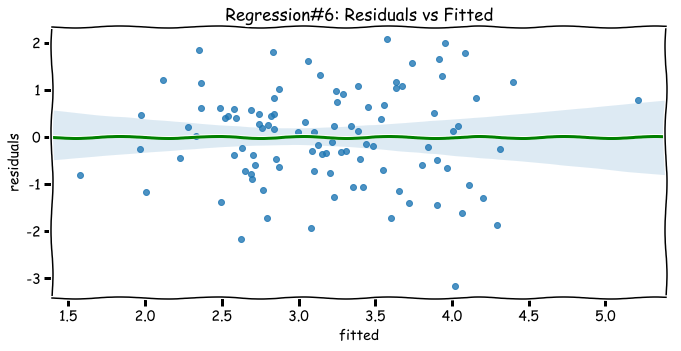

In [108]:
# regression#6: residuals vs fitted plot
plt.xkcd()
fitted_6 = pd.DataFrame([reg_6.predict()]).T
fitted_6.columns = ['fitted']
residuals_6 = reg_6.resid
data_6 = pd.concat([fitted_6, residuals_6.reset_index(drop=True)], axis = 1)
data_6.columns = ['fitted','residuals']
plt.figure(figsize = (11, 5))
reg_plot_6 = sns.regplot(fitted_6, residuals_6, data = data_6)
regline_6 = reg_plot_6.get_lines()[0]
regline_6.set_color('green')
plt.title("Regression#6: Residuals vs Fitted")
plt.xlabel("fitted")
plt.ylabel("residuals")

<Figure size 792x360 with 0 Axes>

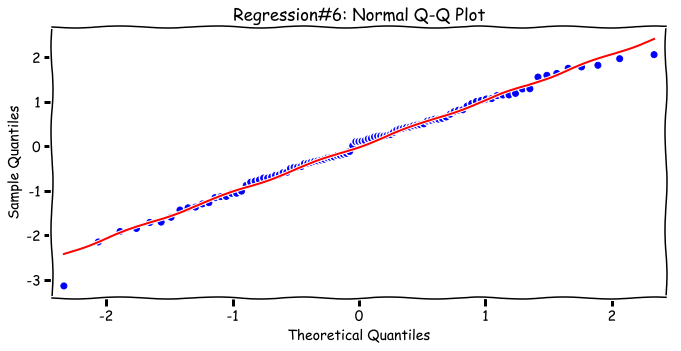

In [109]:
# regression#5: normal q-q plot
plt.figure(figsize = (11, 5))
sm.qqplot(reg_6.resid_pearson, fit = True, line = 'r') # another way to do it
plt.title("Regression#6: Normal Q-Q Plot")
fig = plt.gcf()
fig.set_size_inches(11, 5)
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

invalid value encountered in sqrt



Text(0.5,1,'Regression#6: Scale-Location Plot')

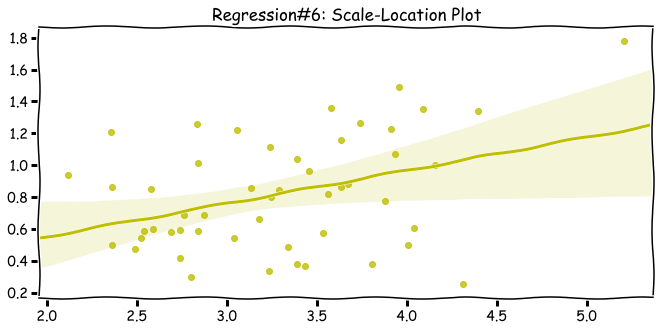

In [110]:
# regression#5: scale-location plot
plt.xkcd()
plt.figure(figsize = (11, 5))
sns.regplot(fitted_6, np.sqrt(reg_5.resid_pearson), fit_reg = True, color = 'y')
plt.title("Regression#6: Scale-Location Plot")

<Figure size 2160x360 with 0 Axes>

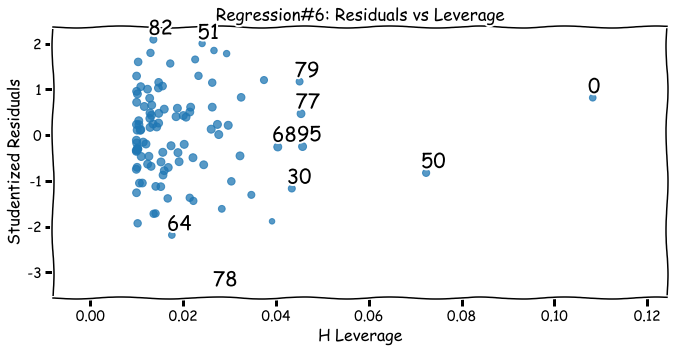

In [111]:
# regression#5: residuals vs leverage plot
plt.xkcd()
fig = plt.figure(figsize = (11, 5))
fig.set_size_inches(30, fig.get_figheight(), forward=True)
sm.graphics.influence_plot(reg_6, criterion="cooks", size = 0.0002**2)
plt.title("Regression#6: Residuals vs Leverage")
fig = plt.gcf()
fig.set_size_inches(11, 5)
plt.show()